In [1]:
import pandas as pd

# Load the data
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')
links_df = pd.read_csv('links.csv')

In [ ]:
# Display the first few rows of each dataframe
print("Ratings Data:")
print(ratings_df.head())
print("\nMovies Data:")
print(movies_df.head())
print("\nLinks Data:")
print(links_df.head())
print("\nTags Data:")
print(tags_df.head())

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Links Data:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  3135

In [ ]:
#number of unique movies
movies = movies_df['movieId'].unique().tolist()
len(movies)

27278

In [ ]:
# Check for missing values
print(ratings_df.isnull().sum())
print(movies_df.isnull().sum())
print(tags_df.isnull().sum())
print(links_df.isnull().sum())

# Handling missing values
ratings_df.dropna(inplace=True)
movies_df.dropna(inplace=True)
tags_df.dropna(inplace=True)
links_df.dropna(inplace=True)


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
movieId    0
imdbId     0
tmdbId     8
dtype: int64


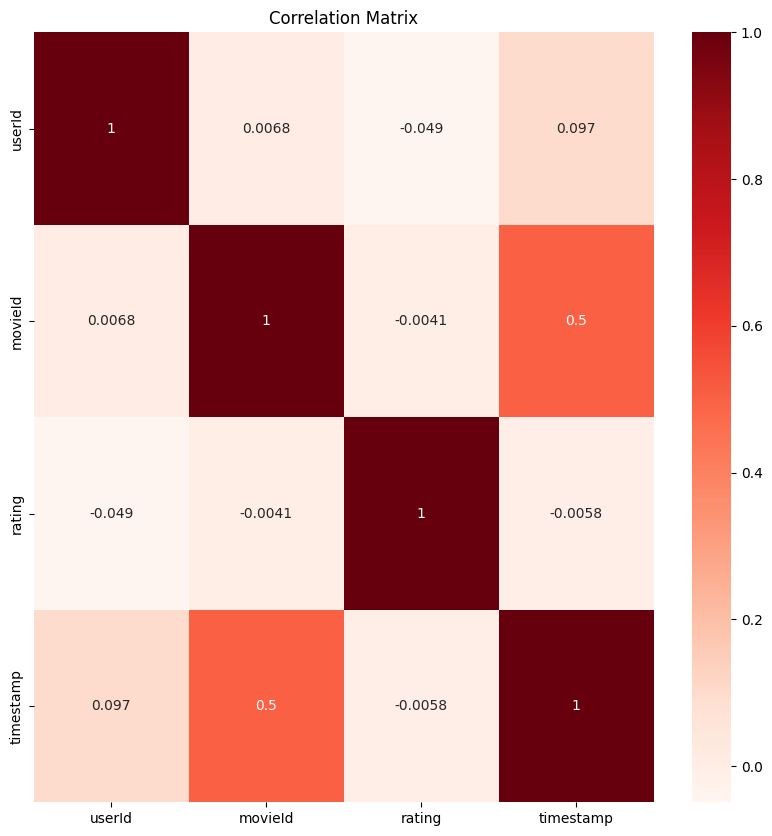

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



plt.figure(figsize=(10,10))

# Plot the correlation matrix heatmap using seaborn
sns.heatmap(ratings_df.corr(), cbar=True, annot=True, cmap='Reds')


plt.title('Correlation Matrix')


plt.show()


In [ ]:
#freq distribution of ratings

rating_dist = ratings_df['rating'].value_counts()
rating_dist

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [2]:
#minimum rating given to a movie
ratings_df['rating'].min()



0.5

In [ ]:
#maximum rating given to a movie
ratings_df['rating'].max()

5.0

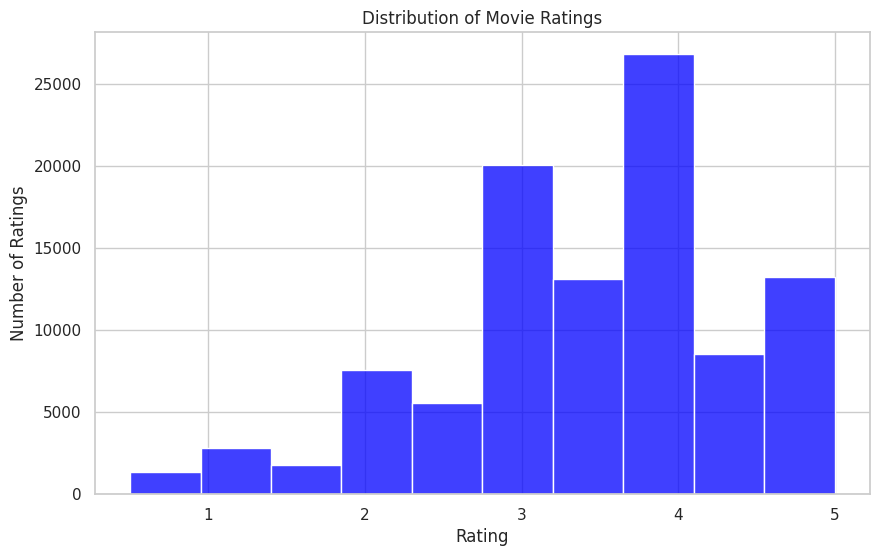

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




sns.set(style="whitegrid")

# Plotting Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

<ipython-input-18-fc5355f68cc5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')


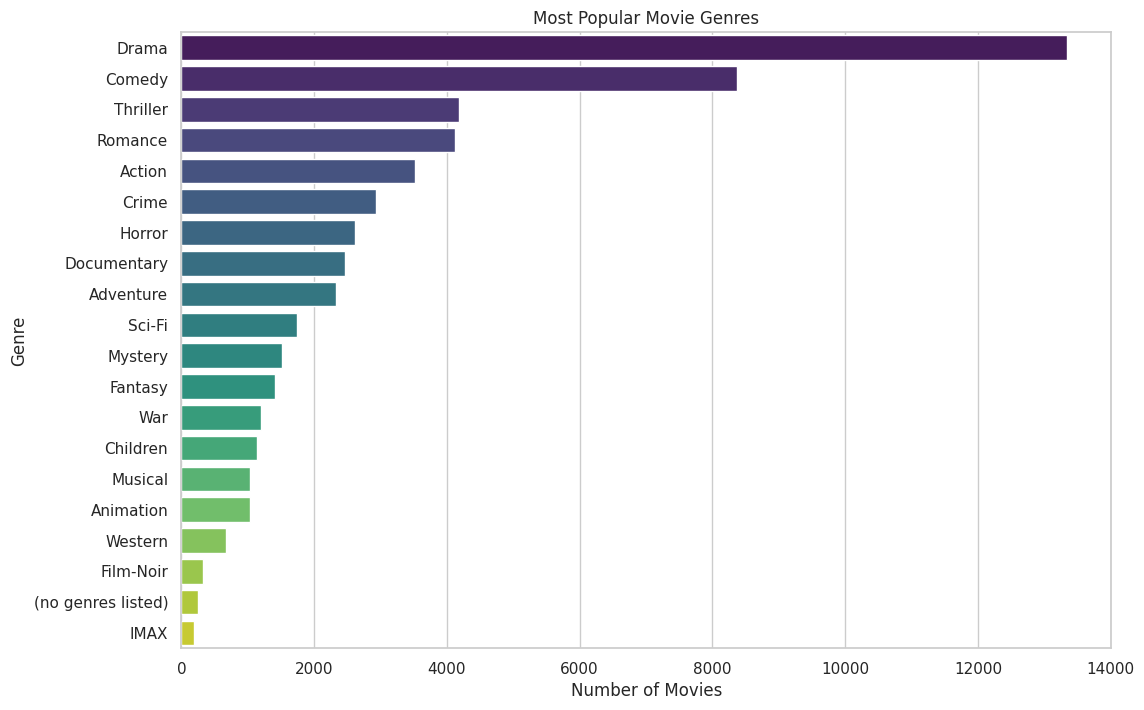

In [ ]:
# Counting genres
genre_counts = movies_df['genres'].str.split('|').explode().value_counts()

# Plotting Most Popular Genres
plt.figure(figsize=(12, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Most Popular Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

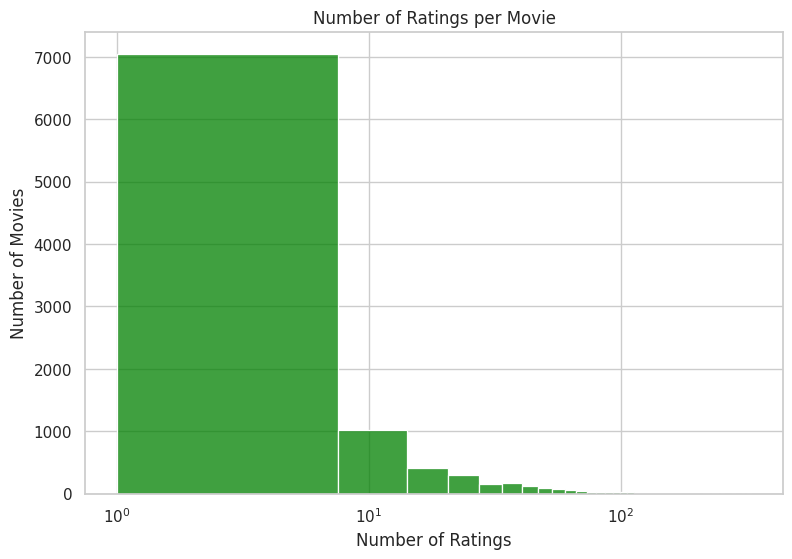

In [ ]:
# Number of Ratings per Movie
ratings_per_movie = ratings_df['movieId'].value_counts()

# Plotting Number of Ratings per Movie
plt.figure(figsize=(9, 6))
sns.histplot(ratings_per_movie.values, bins=50, color='green')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.xscale('log')
plt.show()

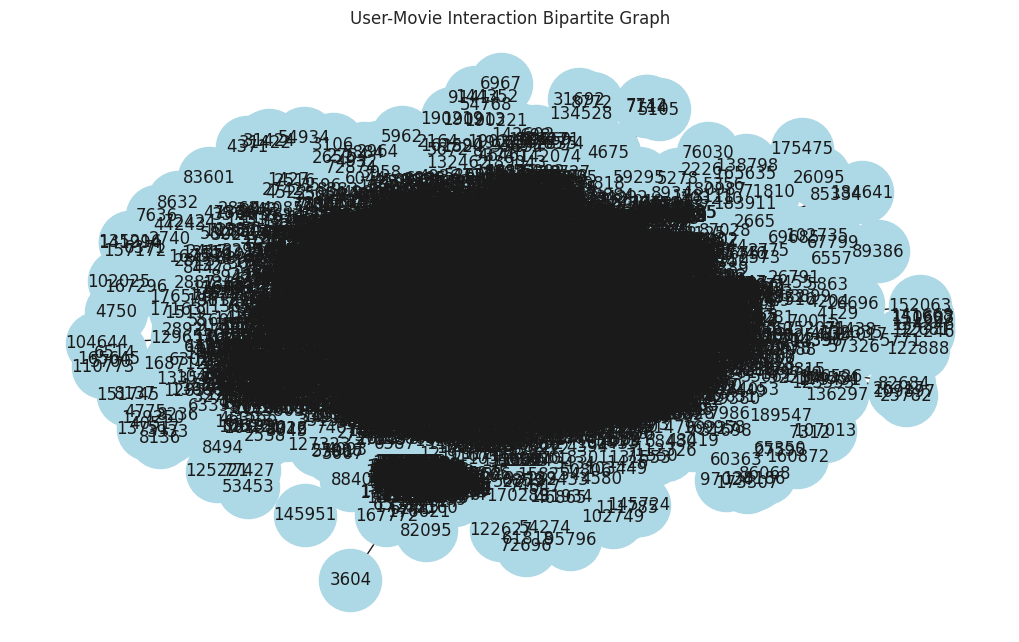

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain

B = nx.Graph()

user_nodes = ratings_df['userId'].unique()
movie_nodes = ratings_df['movieId'].unique()
B.add_nodes_from(user_nodes, bipartite=0)  # Users
B.add_nodes_from(movie_nodes, bipartite=1)  # Movies

# Adding edges between users and movies weighted by rating
for _, row in ratings_df.iterrows():
    B.add_edge(row['userId'], row['movieId'], weight=row['rating'])


pos = nx.spring_layout(B)
plt.figure(figsize=(10, 6))
nx.draw(B, pos, node_color='lightblue', with_labels=True, node_size=2000)
plt.title("User-Movie Interaction Bipartite Graph")
plt.show()

<ipython-input-33-7eb336040b98>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


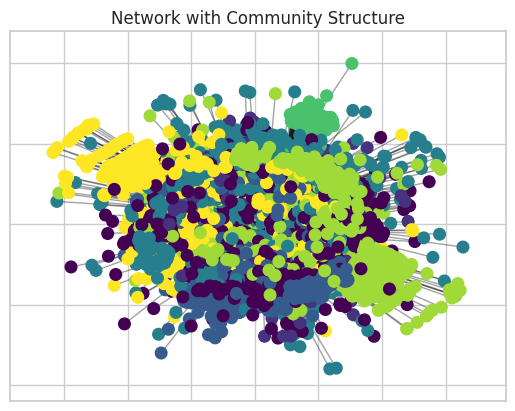

Community sizes:
Community 0: 2355 members
Community 1: 700 members
Community 3: 2749 members
Community 7: 1254 members
Community 2: 1227 members
Community 5: 261 members
Community 6: 1257 members
Community 4: 8 members


In [ ]:
import community.community_louvain as community_louvain

import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt


partition = community_louvain.best_partition(B)

# Visualization of the communities
pos = nx.spring_layout(B)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(B, pos, node_size=70, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(B, pos, alpha=0.4)
plt.title("Network with Community Structure")
plt.show()

# Printing the size of the communities
community_sizes = {}
for node, community in partition.items():
    if community in community_sizes:
        community_sizes[community] += 1
    else:
        community_sizes[community] = 1

print("Community sizes:")
for community, size in community_sizes.items():
    print(f"Community {community}: {size} members")


Text(0, 0.5, 'Frequency')

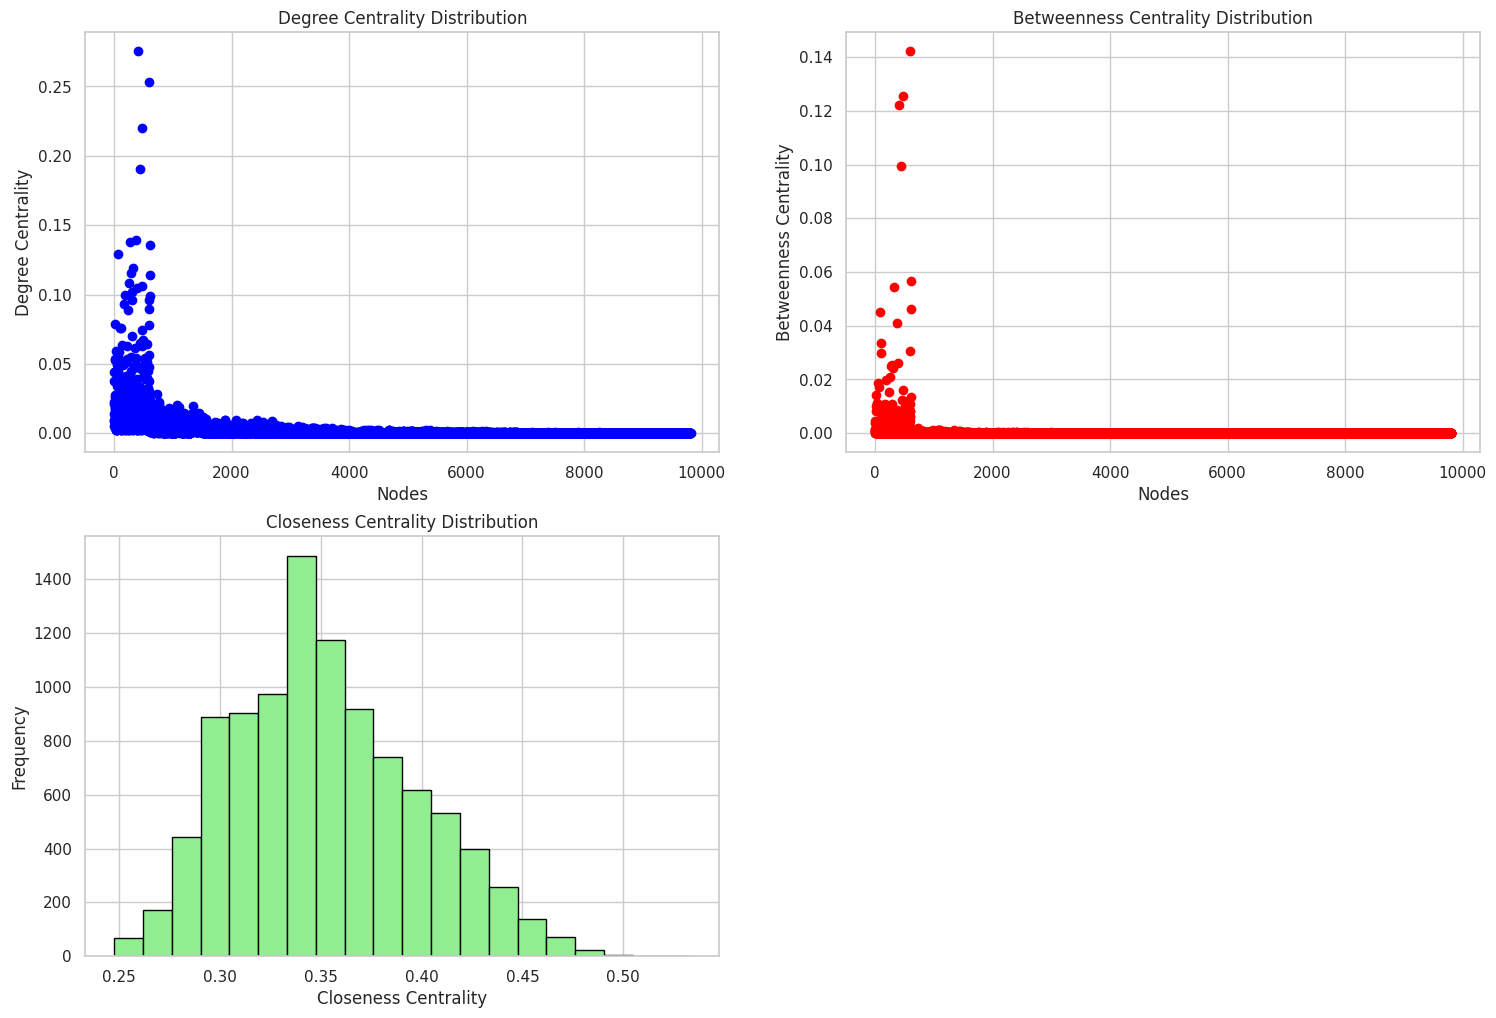

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


degree_centrality = nx.degree_centrality(B)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(B)

# Closeness centrality
closeness_centrality = nx.closeness_centrality(B)




plt.figure(figsize=(18, 12))

# Degree Centrality Scatter Plot
plt.subplot(2, 2, 1)
plt.scatter(range(len(degree_centrality)), list(degree_centrality.values()), color='blue')
plt.title('Degree Centrality Distribution')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.grid(True)

# Betweenness Centrality Scatter Plot
plt.subplot(2, 2, 2)
plt.scatter(range(len(betweenness_centrality)), list(betweenness_centrality.values()), color='red')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.grid(True)

# Closeness Centrality Scatter Plot
plt.subplot(2, 2, 3)
plt.hist(closeness_centrality.values(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')




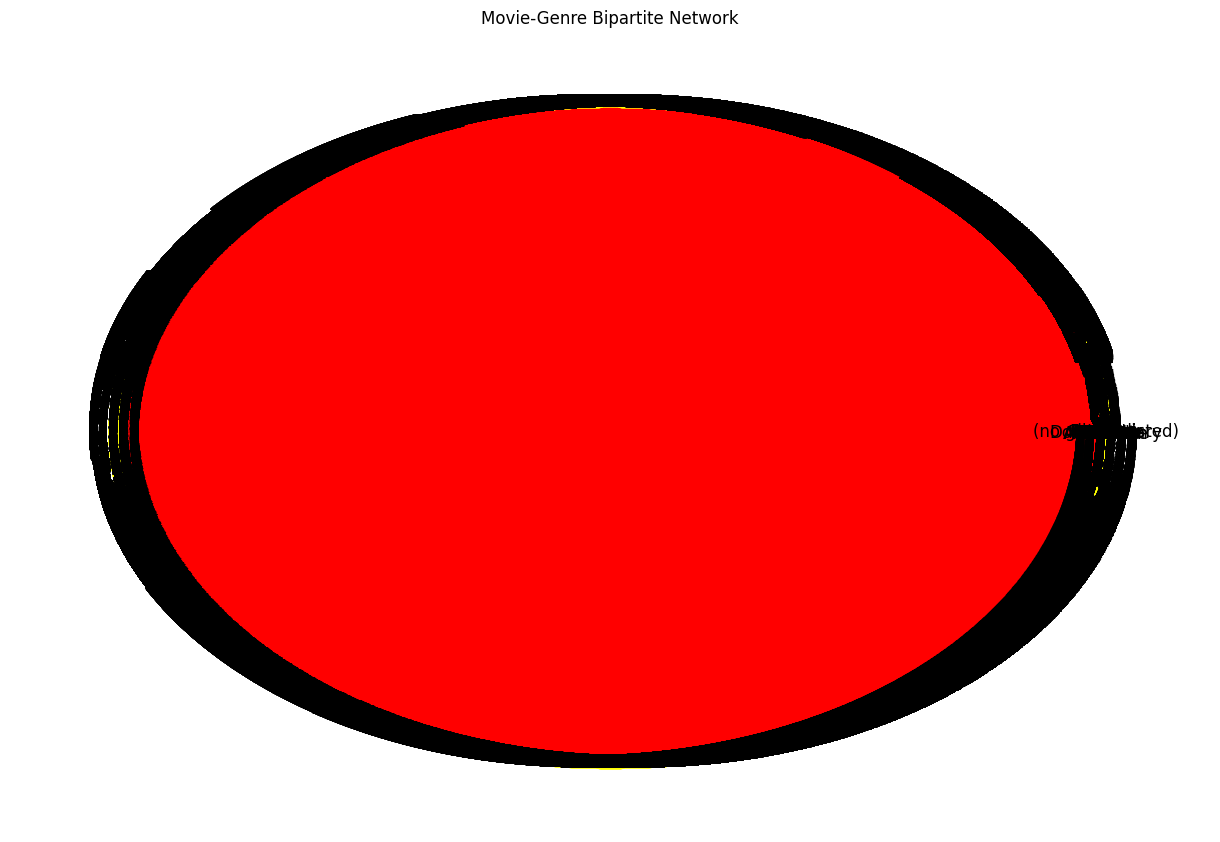

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

movies_df = pd.read_csv('movies.csv')

M = nx.Graph()
M.add_nodes_from(movies_df['movieId'].unique(), bipartite=0)  # Movie nodes

# Adding genre nodes and edges
for _, row in movies_df.iterrows():
    genres = row['genres'].split('|')
    for genre in genres:
        M.add_node(genre, bipartite=1)  # Genre nodes
        M.add_edge(row['movieId'], genre)
pos = nx.circular_layout(M)
# Visualizing the network
plt.figure(figsize=(12, 8))
nx.draw(M, pos, with_labels=True, node_color='yellow', edge_color='red', node_size=50)
plt.title("Movie-Genre Bipartite Network")
plt.show()


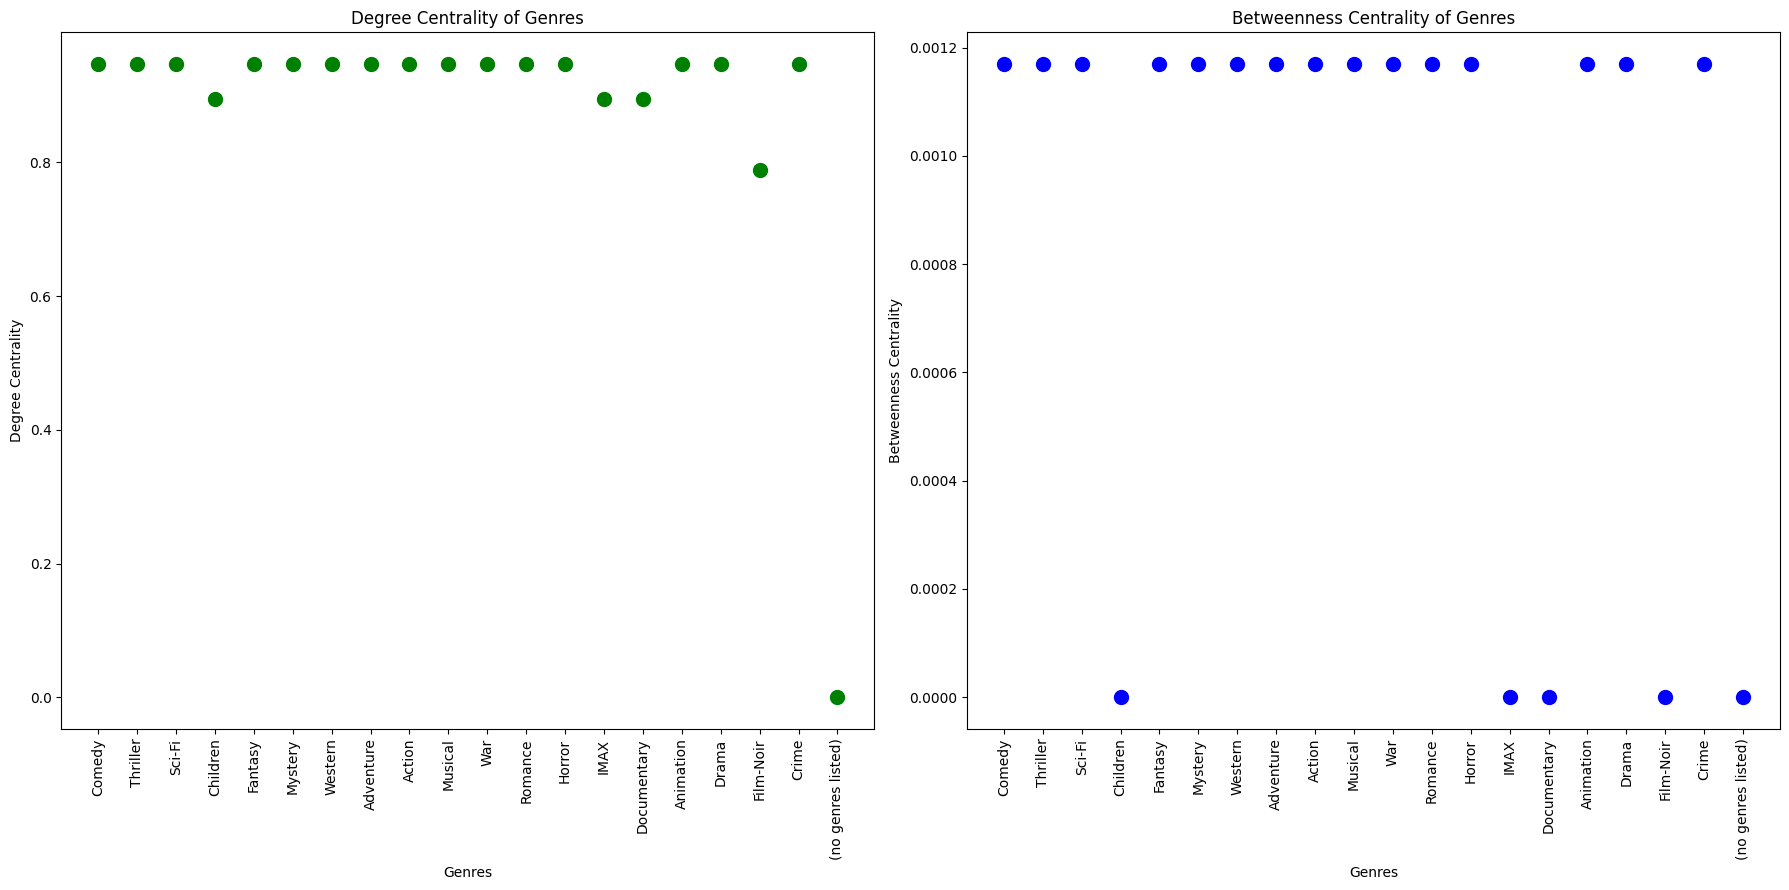

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


movies_df = pd.read_csv('movies.csv')


M = nx.Graph()
M.add_nodes_from(movies_df['movieId'].unique(), bipartite=0)  # Movie nodes

# Adding genre nodes and edges
for _, row in movies_df.iterrows():
    genres = row['genres'].split('|')
    for genre in genres:
        M.add_node(genre, bipartite=1)  # Genre nodes
        M.add_edge(row['movieId'], genre)


genre_nodes = {n for n, d in M.nodes(data=True) if d['bipartite'] == 1}
genre_subgraph = nx.bipartite.weighted_projected_graph(M, genre_nodes)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(genre_subgraph)
betweenness_centrality = nx.betweenness_centrality(genre_subgraph)


genres = list(degree_centrality.keys())
degree_values = list(degree_centrality.values())
betweenness_values = list(betweenness_centrality.values())


fig, ax = plt.subplots(1, 2, figsize=(18, 9))

# Degree Centrality Scatter Plot
ax[0].scatter(genres, degree_values, color='green', s=100)
ax[0].set_title('Degree Centrality of Genres')
ax[0].set_xlabel('Genres')
ax[0].set_ylabel('Degree Centrality')
ax[0].set_xticks(range(len(genres)))
ax[0].set_xticklabels(genres, rotation=90)

# Betweenness Centrality Scatter Plot
ax[1].scatter(genres, betweenness_values, color='blue', s=100)  # Adjusted size
ax[1].set_title('Betweenness Centrality of Genres')
ax[1].set_xlabel('Genres')
ax[1].set_ylabel('Betweenness Centrality')
ax[1].set_xticks(range(len(genres)))
ax[1].set_xticklabels(genres, rotation=90)

plt.tight_layout()
plt.show()


In [3]:
##implementing hits algo
import pandas as pd
import networkx as nx

movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')


B = nx.Graph()


B.add_nodes_from(ratings_df['userId'].unique(), bipartite=0)  # Users
B.add_nodes_from(movies_df['movieId'].unique(), bipartite=1)  # Movies


for _, row in ratings_df.iterrows():
    B.add_edge(row['userId'], row['movieId'], weight=row['rating'])

# Appling the HITS Algorithm
hubs, authorities = nx.hits(B, max_iter=100, normalized=True)

# Sorting the hubs and authorities to find the most influential nodes
sorted_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)

# Printing top 3 hubs and authorities
print("Top 3 Hubs:")
for hub in sorted_hubs[:3]:
    print(f"User ID {hub[0]} with Hub Score: {hub[1]}")

print("\nTop 3 Authorities:")
for auth in sorted_authorities[:3]:
    print(f"Movie ID {auth[0]} with Authority Score: {auth[1]}")


Top 3 Hubs:
User ID 414 with Hub Score: 0.003903258233504924
User ID 474 with Hub Score: 0.0030073386380990936
User ID 380 with Hub Score: 0.0030028142810873465

Top 3 Authorities:
Movie ID 414 with Authority Score: 0.003903258233504913
Movie ID 474 with Authority Score: 0.0030073386380991
Movie ID 380 with Authority Score: 0.003002814281087342


In [4]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite


movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')


B = nx.Graph()

B.add_nodes_from(movies_df['movieId'], bipartite=0)  # Movies
B.add_nodes_from(ratings_df['userId'].unique(), bipartite=1)  # Users


for _, row in ratings_df.iterrows():
    B.add_edge(row['userId'], row['movieId'], weight=row['rating'])


hubs, authorities = nx.hits(B, max_iter=100, normalized=True)


sorted_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)

# Printing  the Top 3 and Bottom 3 hub scores
print("Top 3 Hubs:")
for hub in sorted_hubs[:3]:
    print(f"Node: {hub[0]}, Hub Score: {hub[1]}")

print("\nBottom 3 Hubs:")
for hub in sorted_hubs[-3:]:
    print(f"Node: {hub[0]}, Hub Score: {hub[1]}")




Top 3 Hubs:
Node: 414, Hub Score: 0.003903258233504923
Node: 474, Hub Score: 0.003007338638099093
Node: 380, Hub Score: 0.003002814281087345

Bottom 3 Hubs:
Node: 131258, Hub Score: -0.0
Node: 131260, Hub Score: -0.0
Node: 131262, Hub Score: -0.0
